# 1. Libraries  

In [526]:
#General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
import warnings
warnings.simplefilter('ignore')

#PreProcessing
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [527]:
# read
df = pd.read_csv(r'E:\DS\ML\project\ML_project8_NetIncome\Hackathon_Data\train.csv')
print('Shape: ',df.shape)
df.head()

Shape:  (32724, 16)


,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


# A. EDA 

### 1. Check Null values in percentage & duplicates

In [528]:
(df.isnull().sum()/len(df)*100).round()

ID                0.0
age               0.0
workclass         6.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        6.0
relationship      0.0
race              0.0
gender            0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    2.0
net-income        0.0
dtype: float64

 workcalss, Occupation, native-coountry coln has few missing values replace with Mode

In [529]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True )
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df.isnull().sum()

ID                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
net-income        0
dtype: int64

In [530]:
# Duplicates
df.duplicated().any()

False

### 2. Check all colns Data types 

In [531]:
df.dtypes

ID                 int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
net-income        object
dtype: object

All of are having object, int as datatype 

### 3. Describe data 

In [532]:
df.describe()

,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32724.000000,32724.000000,3.272400e+04,32724.000000,32724.000000,32724.000000,32724.000000
mean,16361.500000,38.574257,1.894990e+05,10.079941,1078.228792,87.700403,40.406216
std,9446.749441,13.712166,1.053437e+05,2.568684,7480.459910,401.872849,12.454379
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,8180.750000,28.000000,1.175280e+05,9.000000,0.000000,0.000000,40.000000
50%,16361.500000,37.000000,1.779005e+05,10.000000,0.000000,0.000000,40.000000
75%,24542.250000,48.000000,2.370062e+05,12.000000,0.000000,0.000000,45.000000
max,32723.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


From given data, 'education' 'education-num' have same meaning values so drop one of them. 'capital-gain' & 'capital-loss' have more than 75% 0 value. so drop it 

In [458]:
# Drop 
df.drop(['education-num', 'capital-gain', 'capital-loss', 'ID'], axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,net-income
0,60,Self-emp-not-inc,235535,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,<=50K
1,28,Self-emp-not-inc,123983,Some-college,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,63,South,<=50K
2,71,Self-emp-not-inc,130436,1st-4th,Divorced,Craft-repair,Not-in-family,White,Female,28,United-States,<=50K
3,75,Private,35724,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,8,United-States,<=50K
4,50,Private,128143,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K


### 3. Age-Group vs Income 

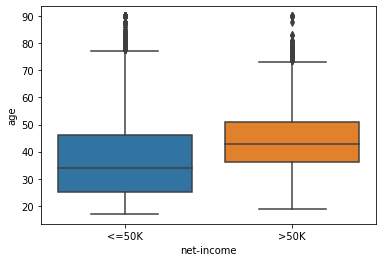

In [459]:
sns.boxplot(y=df['age'], x=df['net-income']);

From above most of people age group 25-48 having income <=50K  &  few people age group 40-52 having income >50K

### 4. Most of Income are from which Work-Class category ?  

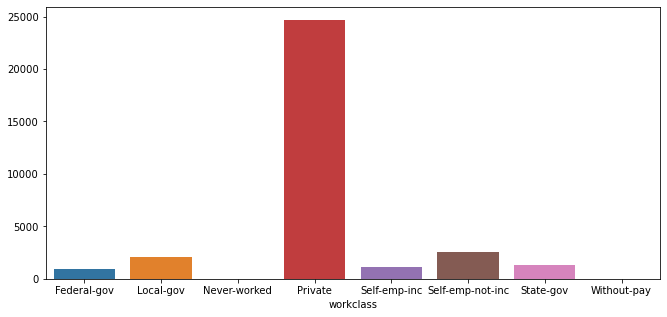

In [460]:
ax = df.groupby('workclass')['net-income'].count()
plt.figure(figsize=(11,5))
sns.barplot(x=ax.index, y=ax.values);

Most People income are from 'Private' work class category 

### 5. Education vs Income  

<AxesSubplot:xlabel='education'>

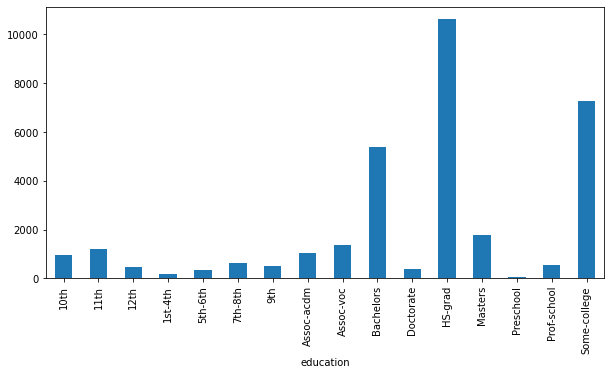

In [461]:
plt.figure(figsize=(10,5))
df.groupby('education')['net-income'].count().plot(kind='bar')

Most of people income are having education 'Hs-grad', 'some-college', 'Bachelors' 

### 6. Martial-status vs net-income

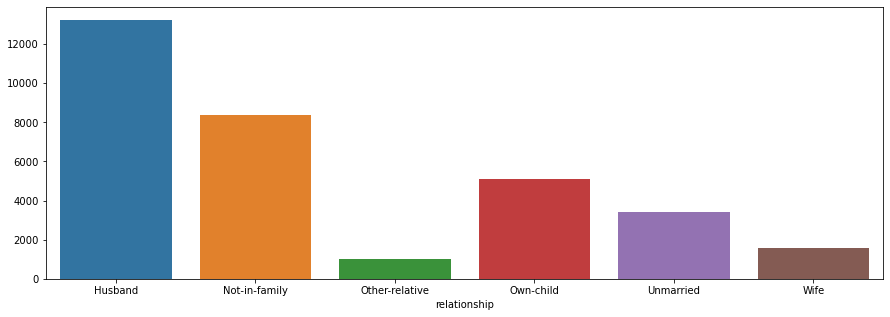

In [462]:
plt.figure(figsize=(15,5))
ax = df.groupby('relationship')['net-income'].count()
sns.barplot(ax.index, ax.values);

Most of income count are of people having a relationship 'Husband' and 'Not-in-family'  

### 7. Effect of 'Work Hours' on Net Income count 

Text(0, 0.5, 'Average hours')

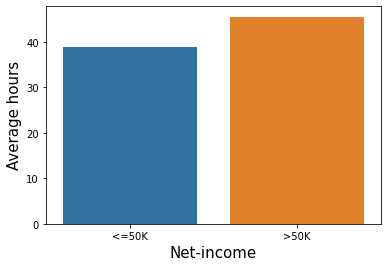

In [463]:
ax =df.groupby('net-income')['hours-per-week'].mean()
ax =sns.barplot(ax.index, ax.values)
ax.set_xlabel('Net-income', size=15)
ax.set_ylabel('Average hours', size=15)

People having income <=50K are working for avg 38hrs. & income >=50K are working for more than 40hrs. 

In [464]:
df['net-income'].count()

32724

### 8. people Type (race) vs Net_income 

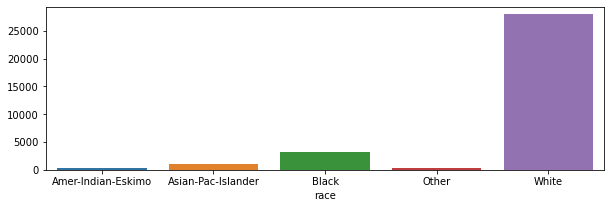

In [465]:
ax = df.groupby('race')['net-income'].count()
plt.figure(figsize=(10,3))
sns.barplot(ax.index, ax.values );

people of 'White' colour is having most income & Ammer-Indian-Eskimo are having less income might be their Literacy

### 9. Most of people impoact on income  are from which country ?    

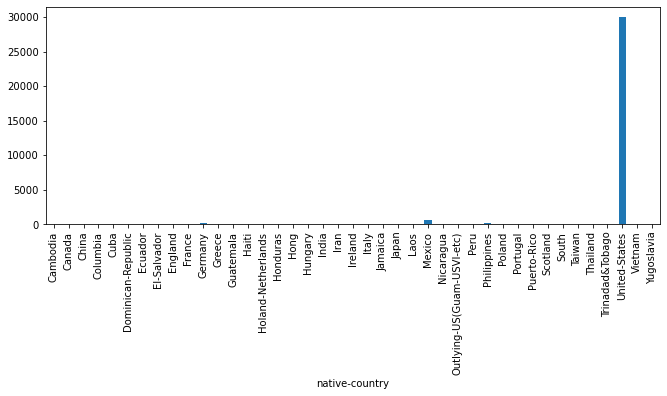

In [466]:
df.groupby('native-country')['net-income'].count().plot(kind='bar', figsize=(11,4));

In given data, most People having income are from 'UnitedStates'. 

### 10. Gender vs  net-income

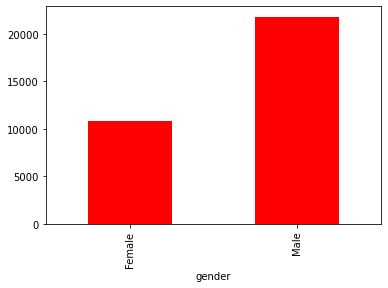

In [467]:
df.groupby('gender')['net-income'].count().plot(kind='bar', color='red');

Almost 50% of Female are also having income or financially independent can say  

### 11. Check outliers in Age

<AxesSubplot:xlabel='age'>

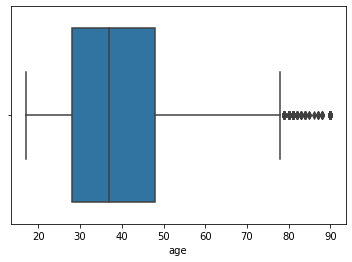

In [468]:
sns.boxplot(df['age'])

Remove records whose age is Greater than 80 

<AxesSubplot:xlabel='age'>

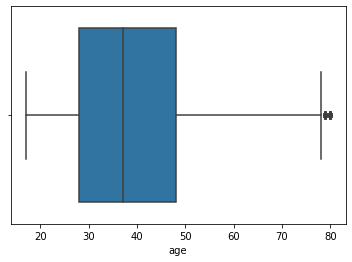

In [469]:
df.drop(df[df['age']>80].index, inplace=True )
sns.boxplot(df['age'])

Now their is no outlier 

In [470]:
# shape
print('Shape is: ',df.shape)
df.head()

Shape is:  (32625, 12)


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,net-income
0,60,Self-emp-not-inc,235535,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,<=50K
1,28,Self-emp-not-inc,123983,Some-college,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,63,South,<=50K
2,71,Self-emp-not-inc,130436,1st-4th,Divorced,Craft-repair,Not-in-family,White,Female,28,United-States,<=50K
3,75,Private,35724,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,8,United-States,<=50K
4,50,Private,128143,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K


# B) Modelling

### 1. Encoding

In [471]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'net-income'],
      dtype='object')

In [472]:
le= LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['gender'] = le.fit_transform(df['gender'])
df['workclass'] = le.fit_transform(df['hours-per-week'])
df['native-country'] = le.fit_transform(df['native-country'])
df['net-income'] = le.fit_transform(df['net-income'])

In [473]:
#Dataset
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,net-income
0,60,47,235535,11,2,3,0,4,1,48,38,0
1,28,62,123983,15,2,11,3,1,1,63,34,0
2,71,27,130436,3,0,2,1,4,0,28,38,0
3,75,7,35724,11,6,9,1,4,0,8,38,0
4,50,49,128143,9,2,2,0,4,1,50,38,1


### 2. HeatMap 

<AxesSubplot:>

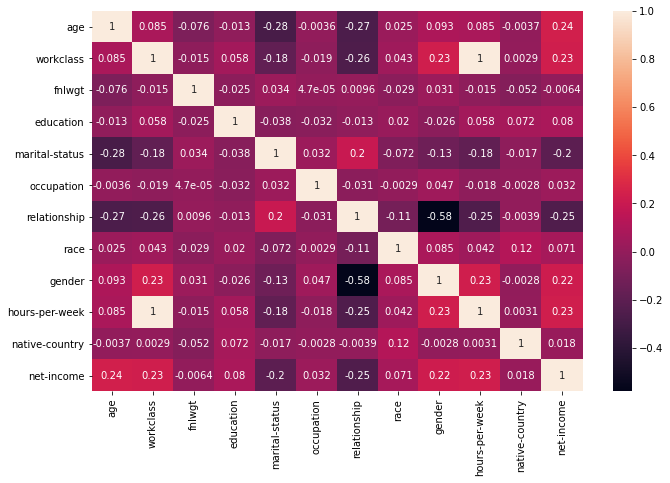

In [474]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), annot=True)

From above, Target is 'Net-income'. 'marital-status' & 'relationship' impacting same on Target so drop one of it.                                                                                      
1. Drop 'relationship'
2. Drop 'finalwgt' weak relationship with Target

In [475]:
df.drop(['relationship','fnlwgt'], axis=1, inplace=True )

### 3. Splitting & Feature scaling

In [476]:
# FinalDataset
df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,net-income
0,60,47,11,2,3,4,1,48,38,0
1,28,62,15,2,11,1,1,63,34,0
2,71,27,3,0,2,4,0,28,38,0
3,75,7,11,6,9,4,0,8,38,0
4,50,49,9,2,2,4,1,50,38,1


In [499]:
# sep Dep & Indep
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [503]:
sc = MinMaxScaler()
X  = sc.fit_transform(X)
X

array([[0.68253968, 0.50537634, 0.73333333, ..., 1.        , 0.47959184,
        0.95      ],
       [0.17460317, 0.66666667, 1.        , ..., 1.        , 0.63265306,
        0.85      ],
       [0.85714286, 0.29032258, 0.2       , ..., 0.        , 0.2755102 ,
        0.95      ],
       ...,
       [0.23809524, 0.33333333, 0.4       , ..., 1.        , 0.31632653,
        0.95      ],
       [0.6031746 , 0.20430108, 1.        , ..., 0.        , 0.19387755,
        0.95      ],
       [0.46031746, 0.52688172, 0.6       , ..., 1.        , 0.5       ,
        0.95      ]])

In [479]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# C) Model-  Knn  

### 1. Training 

In [359]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### 2. Accuracy 

In [378]:
ac = accuracy_score(y_test,y_pred1).round(2)
cv = cross_val_score(knn, X,y, cv=10, scoring='accuracy').mean().round(2)
print('Accuracy: ',ac)
print('Cv_score: ',cv)

Accuracy:  0.81
Cv_score:  0.79


Model is stable very less difference in Accuarcy & cv_score  

# D) Model- Random Forest 

### 1. Training

In [384]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

### 2. Accuracy 

Accuracy:  0.81
Cv_score:  0.81


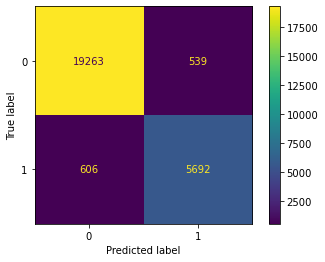

In [427]:
y_pred2 = rf.predict(X_test)

ac = accuracy_score(y_test,y_pred2).round(2)
cv = cross_val_score(rf, X,y, cv=10, scoring='accuracy').mean().round(2)
print('Accuracy: ',ac)
print('Cv_score: ',cv)
plot_confusion_matrix(rf,X_train,y_train);

As we can see accuracy is same but this time Model is much stable than previous one. 

# C) Model- Hypertune RandomForest 

### 1. create Hypertune model RandomizedSearch CV



In [395]:
from sklearn.model_selection import RandomizedSearchCV

# parameters
dist = {'max_depth':[3,5,10,15,20,None]
       ,'n_estimators':[50,100,200,400]
       ,'max_features':randint(3,10)
       ,'criterion':['ginni', 'entropy']
       ,'min_samples_leaf':randint(1,8)
       ,'bootstrap':[True, False]}

In [396]:
# create model by passing above parameter list
est=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=est, param_distributions=dist,n_iter=40, cv=9, n_jobs=-1)

In [397]:
# Fit data and get scores
rf_random.fit(X,y)
print('Best parameters: ',rf_random.best_params_)
print('\nBest score : ',rf_random.best_score_)

Best parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 6, 'n_estimators': 100}

Best score :  0.8358314176245211


### 2. Train model with above params 

In [421]:
hrf = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=8, min_samples_leaf=6, criterion='entropy', bootstrap=True)
hrf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=8,
                       min_samples_leaf=6)

### 3. Accuracy 

In [424]:
y_pred3 = hrf.predict(X_test)

ac = accuracy_score(y_test, y_pred3).round(2)
cv = cv = cross_val_score(hrf, X,y, cv=10, scoring='accuracy').mean().round(2)
print('Accuracy: ',ac)
print('Cv_score: ',cv)

Accuracy:  0.84
Cv_score:  0.83


Accuracy is Increased after hypertuning the Randomforest Model 

# D) Model-  NaiveBayes 

### 1. Train 

In [430]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

### Accuracy 

In [431]:
y_pred4 = nb.predict(X_test)

ac = accuracy_score(y_test, y_pred4).round(2)
cv = cv = cross_val_score(nb, X,y, cv=10, scoring='accuracy').mean().round(2)
print('Accuracy: ',ac)
print('Cv_score: ',cv)

Accuracy:  0.77
Cv_score:  0.71


# E) Model- Svm 

In [445]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')   
classifier.fit(X_train, y_train)

SVC()

In [448]:
#3. prediction
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy: ',ac)

Accuracy:  0.8087356321839081


# F) Feature Selection important 

In [513]:
# scaling again to get column name
Xn = sc.fit_transform(X)
Xn =pd.DataFrame(Xn,columns=X.columns) # converting into dataframe

In [516]:
# Model for Feature Selection
from sklearn.ensemble import ExtraTreesRegressor
model0 = ExtraTreesRegressor()
model0.fit(Xn,y)

ExtraTreesRegressor()

###  Important Feature Values 

[0.28533625 0.07650856 0.15701281 0.17928013 0.12429403 0.02806823
 0.04114037 0.07822888 0.03013075]


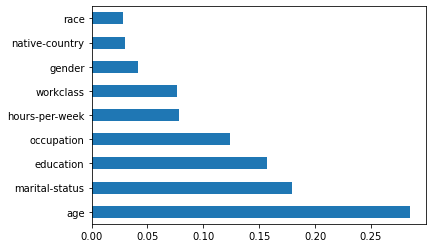

In [519]:
print(model0.feature_importances_)

#Visualisatn
ax = pd.Series(model0.feature_importances_, index=X.columns )
ax.sort_values(ascending=False).plot(kind='barh');

### From above age, marital-status, education, occupation is important Feature predict with this Top 4 features  

# Performance of Models:

#### 1. Knn_Accuracy:  81.0%
#### 2. RandomForest _Accuracy:  81.0%
####    Hypertune_model : 84%
#### 3. NaiveBaye's-Multinomial_Accuracy:  77.5%
#### 4. SVM_Accuracy:  80.87%

### From above we can see Hypertune_RandomForest Model is best accuracy with 84% 